<a href="https://colab.research.google.com/github/aziz0519/reddit-crypto-nlp-project/blob/master/RedditAPI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Cryptocurrency Headlines from Reddit API using PRAW

> In this project, we will be analysing the sentiments of the hot headlines of cryptocurrency and build a Latent Dirichlet Allocation model for topical breakdown of the headlines

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import praw

user_agent = "Scraper 1.0 "

reddit = praw.Reddit(
    client_id= process.env.client_id ,
    client_secret= process.env.client_secret,
    user_agent=user_agent,
    check_for_sync=False
)

In [5]:
headlines = set()

for submission in reddit.subreddit('cryptocurrency').hot(limit=None):
  headlines.add(submission.title)

print(len(headlines))


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

641


In [6]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Bitcoin miner Marathon sees Q4 revenue decline...
1,"Daily General Discussion - March 17, 2023 (GMT+0)"
2,What do you think of XRP and that whole family...
3,Coinbase's Grewal hails Ripple's defense effor...
4,Your Hardware Wallet CAN be drained- even IF y...


In [ ]:
# df.to_csv("headlines.csv", index=False, header=False, encoding="utf-8")

In [7]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [9]:
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)


pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Bitcoin miner Marathon sees Q4 revenue decline 58% to $28.4 million',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Daily General Discussion - March 17, 2023 (GMT+0)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4939,
  'headline': 'What do you think of XRP and that whole family of crypto? A friend keeps telling me '
              'it will be aligned with gold in a 1:1 ratio and I don’t understand where he’s '
              'getting that from',
  'neg': 0.0,
  'neu': 0.909,
  'pos': 0.091}]


In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Bitcoin miner Marathon sees Q4 revenue decline...
1,0.000,1.000,0.000,0.0000,"Daily General Discussion - March 17, 2023 (GMT+0)"
2,0.000,0.909,0.091,0.4939,What do you think of XRP and that whole family...
3,0.000,0.842,0.158,0.1280,Coinbase's Grewal hails Ripple's defense effor...
4,0.084,0.640,0.276,0.6892,Your Hardware Wallet CAN be drained- even IF y...


In [11]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Bitcoin miner Marathon sees Q4 revenue decline...,0
1,0.000,1.000,0.000,0.0000,"Daily General Discussion - March 17, 2023 (GMT+0)",0
2,0.000,0.909,0.091,0.4939,What do you think of XRP and that whole family...,1
3,0.000,0.842,0.158,0.1280,Coinbase's Grewal hails Ripple's defense effor...,0
4,0.084,0.640,0.276,0.6892,Your Hardware Wallet CAN be drained- even IF y...,1


In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

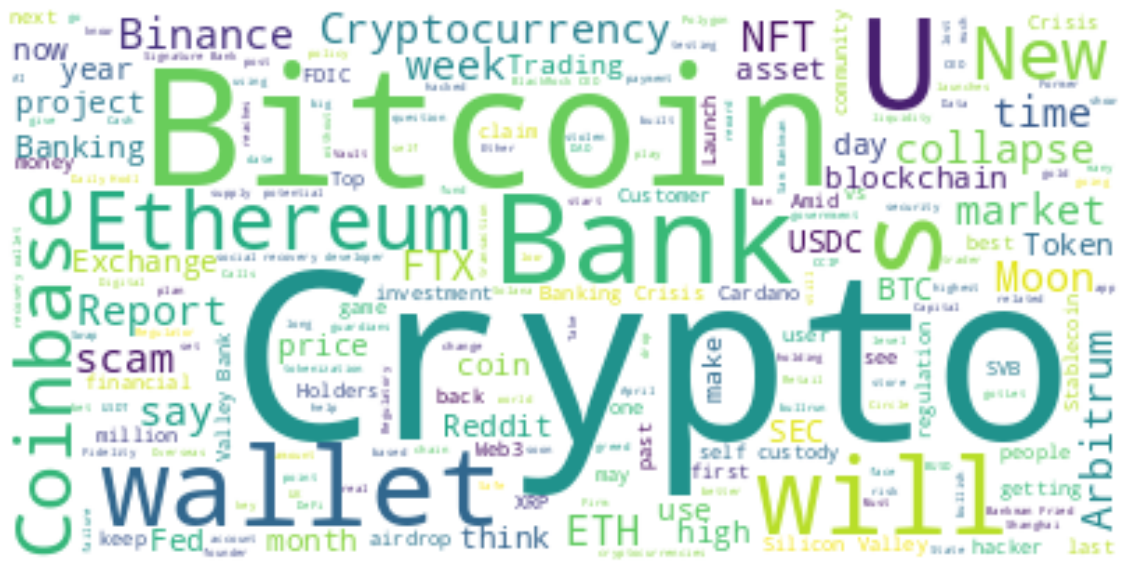

In [13]:
text = " ".join(i for i in df['headline'])
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white", max_words=300).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df2 = df[['headline','label']]
df.label.value_counts(normalize=True) * 100

 0    51.014041
-1    24.804992
 1    24.180967
Name: label, dtype: float64

In [15]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == - 1].headline[:5]), width=200)

Positive headlines:

['What do you think of XRP and that whole family of crypto? A friend keeps telling me it will be aligned with gold in a 1:1 ratio and I don’t understand where he’s getting that from',
 'Your Hardware Wallet CAN be drained- even IF you keep your seed phrase secure! Are you safe? Please learn how to Revoke Allowances!',
 'Over a decade of easy money has blurred the line between speculation and investment',
 "What are your guys' thoughts on the Pi Core project? I have been following it for a while but don't know how to evaluate a project like this.",
 'Crypto.com likes to pretend to offer compelling benefits for their users like "rewards", but...']
Negative headlines:

['Standard Bank CEO worries retail CBDC could be unfair competition. “they could exploit the self-verifying properties of blockchain to simplify inter-bank clearing”.',
 'Who else has given in to temptation and regretted it?',
 'Banks resume slide as First Republic gets $30B in deposits. When was throwi

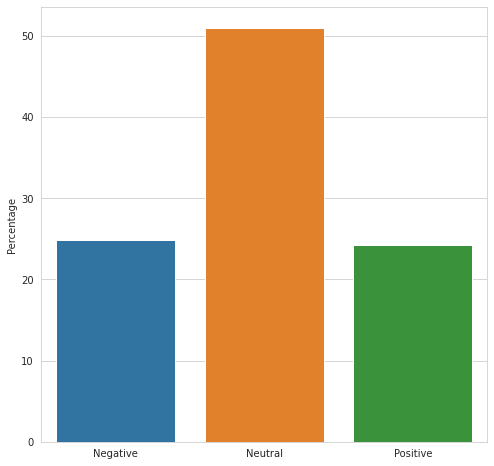

In [16]:
f, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [17]:
import re
df['headline_processed'] = df['headline'].map(lambda x : re.sub('[,\.!?]', '', x))
df['headline_processed'] = df['headline_processed'].map(lambda x : x.lower())
df.head()

,neg,neu,pos,compound,headline,label,headline_processed
0,0.000,1.000,0.000,0.0000,Bitcoin miner Marathon sees Q4 revenue decline...,0,bitcoin miner marathon sees q4 revenue decline...
1,0.000,1.000,0.000,0.0000,"Daily General Discussion - March 17, 2023 (GMT+0)",0,daily general discussion - march 17 2023 (gmt+0)
2,0.000,0.909,0.091,0.4939,What do you think of XRP and that whole family...,1,what do you think of xrp and that whole family...
3,0.000,0.842,0.158,0.1280,Coinbase's Grewal hails Ripple's defense effor...,0,coinbase's grewal hails ripple's defense effor...
4,0.084,0.640,0.276,0.6892,Your Hardware Wallet CAN be drained- even IF y...,1,your hardware wallet can be drained- even if y...


In [18]:
import gensim 
from gensim.utils import simple_preprocess

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
stop_words = stopwords.words('english')
stop_words.extend(['bitcoin','crypto','bank','reddit','banks','cryptocurrency','wallet'])

In [21]:
def sentence_to_words(stncs):
  for i in stncs:
    yield(simple_preprocess(str(i), deacc=True))

In [22]:
def rm_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if not word in stop_words] for doc in texts]

In [23]:
data = df.headline_processed.values.tolist()
data_words = list(sentence_to_words(data))

In [24]:
# remove stop words
data_words = rm_stopwords(data_words)
print(data_words[:1][0][:30])

['miner', 'marathon', 'sees', 'revenue', 'decline', 'million']


In [25]:
import gensim.corpora as corpora 
id2word = corpora.Dictionary(data_words)

In [26]:
txt = data_words
corpus = [id2word.doc2bow(text) for text in txt]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [27]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"fdic" + 0.005*"could" + 0.005*"cardano" + 0.005*"signature" + '
  '0.005*"blackrock" + 0.005*"keys" + 0.004*"sec" + 0.004*"exchanges" + '
  '0.004*"ethereum" + 0.004*"svb"'),
 (1,
  '0.011*"new" + 0.009*"coinbase" + 0.007*"us" + 0.005*"long" + 0.005*"sec" + '
  '0.005*"collapse" + 0.005*"fed" + 0.005*"scams" + 0.004*"blockchain" + '
  '0.004*"project"'),
 (2,
  '0.011*"new" + 0.009*"banking" + 0.007*"use" + 0.005*"binance" + '
  '0.005*"could" + 0.005*"credit" + 0.005*"liquidity" + 0.005*"make" + '
  '0.005*"market" + 0.005*"custody"'),
 (3,
  '0.010*"coinbase" + 0.007*"arbitrum" + 0.007*"week" + 0.005*"us" + '
  '0.005*"shanghai" + 0.005*"ethereum" + 0.005*"upgrade" + 0.005*"eth" + '
  '0.005*"april" + 0.005*"svb"'),
 (4,
  '0.008*"custody" + 0.008*"vitalik" + 0.008*"self" + 0.007*"guardians" + '
  '0.007*"like" + 0.005*"xrp" + 0.005*"ethereum" + 0.005*"us" + '
  '0.005*"wallets" + 0.005*"know"'),
 (5,
  '0.008*"million" + 0.008*"could" + 0.006*"us" + 0.006*"week" + '
 

In [29]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.080615 -0.027513       1        1  12.866335
7     -0.111758 -0.115588       2        1  12.584456
5     -0.081787  0.138247       3        1  12.522023
6     -0.094671  0.006174       4        1  11.337533
4      0.058674 -0.007210       5        1   9.117574
0      0.032128  0.076014       6        1   8.917273
8      0.078808  0.002526       7        1   8.492732
3      0.000358 -0.004933       8        1   8.188029
1      0.013582 -0.057661       9        1   8.011993
9      0.024050 -0.010056      10        1   7.962052, topic_info=           Term       Freq      Total Category  logprob  loglift
215         new  13.000000  13.000000  Default  30.0000  30.0000
864     custody   8.000000   8.000000  Default  29.0000  29.0000
405     banking  22.000000  22.000000  Default  28.0000  28.0000
150      crisis  13.000000  13.000000  Default  27.0000  27.0000
1163  microsoft   5.000000   5.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
45       report   1.330298  11.159787  Topic10  -5.5962   0.4036
233   community   1.330284   5.981308  Topic10  -5.5962   1.0272
112      social   1.330276   6.020493  Topic10  -5.5962   1.0207
85        moons   1.330269   8.765454  Topic10  -5.5962   0.6450
464        last   1.330265   7.370974  Topic10  -5.5962   0.8183

[652 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1553      1  0.300476    access
1553      4  0.300476    access
1553      9  0.300476    access
68        1  0.360577   account
68        3  0.360577   account
...     ...       ...       ...
22        5  0.370670       xrp
22        8  0.185335       xrp
22        9  0.185335       xrp
629       2  0.714933  zenminer
2173      3  0.728665  zeppelin

[1172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 6, 7, 5, 1, 9, 4, 2, 10])